![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# CALM - Moving Out Project

Imagine that you are in your early twenties and it is time to move out of your family home.

You work 40 hours per week and your wage is $15.00 per hour gross income (before deductions).

You will be required to calculate your net income and manage financial resources effectively.

You may choose to live with a roommate. If you choose to live with a roommate and share rent, you must each complete and hand in a separate assignment.

You will use the internet for all the information required to complete this project. However, you may want to also refer to flyers to find prices for food and household items.

## My Personal Profile - Age Twenty-something
Complete these questions based on what your hope of plan to do wtih your life. Double-click on a cell in order to edit it.

My name is 

1. I will move out of my family home at the age of 

2. My educational path will be 

3. My occupation or job at that time will be 

4. I expect to take home $      each month.

5. I (will / will not) be married sometime in my twenties.

6. By the age of 30 I will likely have     children.

7. I (will / will not) buy a home sometime in my twenties.

8. My home or living accommodations will be described as



9. I will be living in or near the city/town of 

10. A vehicle I would like to drive when I'm in my twenties is

11. Other things I own will be
    1. 
    2. 
    3. 

12. I (will / will not) plan to travel in my twenties.

13. If I plan to travel, some of my vacations will be
    1. 
    2. 
    3. 

14. My major accomplishments or bucket list items in my twenties will be
    1. 
    2. 
    3. 

## Income

### Paycheque Definitions

#### Gross Income (pay/earnings)
The amount of income/earnings, for any pay period, before deductions
 
#### Net income (pay/earnings)
The amount of income/earnings, for any pay period, after deductions (Take home pay)
 
 
#### CPP - Canada Pension Plan
2.3% of gross income deducted for insurance in case of unemployment
 
#### Income Tax
A deduction paid to the Federal and Provincial government for taxes
 
#### LTD
A deduction for Long Term Disability insurance
 
#### Union Dues
Fees paid for membership in a union
 
#### Bonds
An investment in which a business or government pays a set interest rate
 
#### Advance Earnings
Deducted money that was received in advance of the pay cheque
 
#### Overtime Earnings
Pay received for working over 8 hours a day or 44 hours a week, whichever is greater

### Calculating Net Income

Click on the code cell below, then press the Run button on the toolbar to calculate your net income. You may also change some values in the code to see how the results change.

In [14]:
wagePerHour = 15  # this is your wage in $/hour
hoursPerDay = 8
daysPerMonth = 21

grossIncome = wagePerHour * hoursPerDay * daysPerMonth
print('Your gross income is $', grossIncome, 'per month.')

incomeTax = .15 + .10 # assume federal income tax is 15% and provincial is 10%
cpp = .0495  # assume Canada Pension Plan is 4.95%
ei = .0188  # assume Employment Insurance is 1.88%
unionDues = .0075  # 0.75% sounds reasonable for union dues

deductions = grossIncome * (incomeTax + cpp + ei + unionDues)
print('$', '{:.2f}'.format(deductions), ' will be taken off your paycheck.')

netIncome = grossIncome - deductions
print('Your net income is $', '{:.2f}'.format(netIncome), 'per month.')

Your gross income is $ 2520 per month.
$ 821.02  will be taken off your paycheck.
Your net income is $ 1698.98 per month.


We can also look at how your net income (take-home pay) changes based on your hourly wage. We will use [2019 taxation rates](https://www.canada.ca/en/revenue-agency/services/tax/individuals/frequently-asked-questions-individuals/canadian-income-tax-rates-individuals-current-previous-years.html).

In [3]:
def calculateFederalTax(income):
    taxBrackets = [47630, 95259, 147667, 210371]
    taxRates = [.15, .205, .26, .29, .33]
    taxes = []
    for i in range(0, len(taxBrackets)):
        taxes.append(taxBrackets[i] * taxRates[i])
    if income < taxBrackets[0]:
        tax = income * taxRates[0]
    elif income < taxBrackets[1]:
        tax = taxes[0] + (income - taxBrackets[0]) * taxRates[1]
    elif income < taxBrackets[2]:
        tax = taxes[1] + (income - taxBrackets[1]) * taxRates[2]
    elif income < taxBrackets[3]:
        tax = taxes[2] + (income - taxBrackets[2]) * taxRates[3]
    else:
        tax = taxes[3] + (income - taxBrackets[3]) * taxRates[4]
    return tax

def calculateProvincialTax(income):
    taxBrackets = [131220, 157464, 209952, 314928] # for Alberta
    taxRates = [.1, .12, .13, .14, .15]
    taxes = []
    for i in range(0, len(taxBrackets)):
        taxes.append(taxBrackets[i] * taxRates[i])
    if income < taxBrackets[0]:
        tax = income * taxRates[0]
    elif income < taxBrackets[1]:
        tax = taxes[0] + (income - taxBrackets[0]) * taxRates[1]
    elif income < taxBrackets[2]:
        tax = taxes[1] + (income - taxBrackets[1]) * taxRates[2]
    elif income < taxBrackets[3]:
        tax = taxes[2] + (income - taxBrackets[2]) * taxRates[3]
    else:
        tax = taxes[3] + (income - taxBrackets[3]) * taxRates[4]
    return tax

def calcuateEI(income):
    eiMaxInsurableEarnings = 53100
    eiRate = 0.0162
    if income >= eiMaxInsurableEarnings:
        eiPremium = eiMaxInsurableEarnings * eiRate
    else:
        eiPremium = income * eiRate
    return eiPremium

def calculateCPP(income):
    cppMaxContributoryEarnings = 53900
    cppRate = 0.051
    if income >= cppMaxContributoryEarnings:
        cppPremium = cppMaxContributoryEarnings * cppRate
    else:
        cppPremium = income * cppRate
    return cppPremium

wages = []
grossIncomes = []
netIncomes = []
for wage in range(15, 150):
    wages.append(wage)
    grossAnnualIncome = wage * 8 * 240
    grossIncomes.append(grossAnnualIncome)
    incomeTax = calculateFederalTax(grossAnnualIncome) + calculateProvincialTax(grossAnnualIncome)
    eiPremium = calcuateEI(grossAnnualIncome)
    cppPremium = calculateCPP(grossAnnualIncome)
    netIncome = grossAnnualIncome - (incomeTax + eiPremium + cppPremium)
    netIncomes.append(netIncome)

import plotly.graph_objects as go
fig = go.Figure()
#fig.add_trace(go.Scatter(x=wages, y=grossIncomes, name='Gross Income'))
fig.add_trace(go.Scatter(x=wages, y=netIncomes, name='Net Income'))
fig.update_layout(
    title=go.layout.Title(text='Net Income vs Hourly Wage'),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Hourly Wage')),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Income')))
fig.show()

### Accomodation Options

Using [Kijiji](https://www.kijiji.ca) or other internet sources, investigate each of the following options and add information to the cells.

#### Apartment
Advantages:
1. 
2. 
3. 

Disadvantages:
1. 
2. 
3. 

Approximate cost per month: 

#### Townhouse or Duplex
Advantages:
1. 
2. 
3. 

Disadvantages:
1. 
2. 
3. 

Approximate cost per month: 

#### Single Detached House
Advantages:
1. 
2. 
3. 

Disadvantages:
1. 
2. 
3. 

Approximate cost per month: 

The best choice of housing for a retired couple with no children who do not want to cut grass or do other maintenance is _______ because

The best choice of housing for a middle-aged couple with two small children who what room for children and friends to visit is _______ because

The best choice of housing for a young couple with a small child is _______ because

The best choice of housing for a young, single person who travels frequently for work is _______ because

The type of home I picture myself in when I decide to move out is (be descriptive)

For the purpose of this project you will consider rental properties only. Find an online listing for a suitable place to rent and include a screenshot below.

Carefully read the listing to see if any untilities are included, as well as the amount of the damage deposit or security deposit. You will need that information later in this assignment.

## Expenses
Expenses are the money that you spend on necessary or desired goods and services.

Some expenses can be decreased by having a roommate. For the purposes of this project you may **not** choose to have more than one roommate.

Complete the statements in the cells below.

Four advantages of living on my own are:
1. 
2. 
3. 
4. 

Four disadvantages of living on my own are:
1. 
2. 
3. 
4. 

Four advantages of living with a roommate are:
1. 
2. 
3. 
4. 

Four disadvantages of living with a roommate are:
1. 
2. 
3. 
4. 

My decision is to live (on my own / with a roommate) because 

Four essential characteristics of a roommate are:
1. 
2. 
3. 
4. 

### Calculating Housing Expenses
Follow the instructions in the code below, then run the cell to calculate your monthly housing expenses.

In [18]:
rent = 900

# change this to 1 if you plan to have a roommate
roommate = 0

# Natural Gas is hard to estimate, depending on different circumstances, but rough guidelines are:
#  Average 1200 sq. ft. house - $94 per month
#  New energy efficient average home (1200 sq. ft.) - $67 per month
#  Large new home (1800 sq. ft.) - $90 per month
#  Larger older home with heated garage - $128 per month
# enter 0 if this is included in your rent
heating = 94

# Electricity:
#  an average two-bedroom apartment will cost about $50 per month
#  a small 1100 square foot home with the usual appliances will cost $75 per month
#  a large home with many appliances, a hot tub, and air conditioning will cost over $120 per month
electricity = 75

# Water and Waste will be about 60 for an apartment, 100 for a house
waterAndWaste = 100

# Tenant Insurance: each individual must have their own tenant insurance to cover their belongings
# in case of fire, theft, flooding, or natural disaster. Landlords have insurance on the building
# but not on your personal possessions. Use the following chart to estimate how much you would pay:
#  Value    Annual Premium (we will divide this by 12 to get the monthly cost)
#  $10,000  $92
#  $20,000  $159
#  $30,000  $208
#  $40,000  $268
#  $50,000  $305
#  $60,000  $367
tenantInsurance = 367 / 12

# TV and Internet Access: check out Shaw and Telus to see what plans are available
internet = 100

# Mobile Phone: check out various service providers and choose a plan
phone = 65

# Now you've finished adjusting the code, run the cell to calculate your monthly housing costs
if roommate == 1:
    monthlyCosts = (rent + heating + electricity + waterAndWaste + internet) / 2 + tenantInsurance + phone
else:
    monthlyCosts = rent + heating + electricity + waterAndWaste + tenantInsurance + phone + internet

print('Your monthly costs will be approximately $', '{:.2f}'.format(monthlyCosts))
print('This is', '{:.1f}'.format(monthlyCosts / netIncome * 100), '% of your net income.')

# consider adding a pie chart of expenses, perhaps with sliders for each value

Your monthly costs will be approximately $ 1364.58
This is 70.2 % of your net income.


## Moving Expenses
As well as the monthly expenses there are one-time moving expenses to consider:

In [65]:
# Security / Damage Deposit: this is usually equal to one month's rent.
#  You can get your deposit back when you move out if you take care of your home.
#  Some landlords charge a non-refundable pet fee.
damageDeposit = rent
petFee = 0

# If you plan to have a pet, estimate the cost of the pet, toys, furniture, etc.
petPurchase = 1000

# There are sometimes utility activation or hookup costs
electricalActivation = 10
naturalGasActivation = 10
waterActivation = 0
internetActivation = 0
mobilePhoneActivitation = 25

mobilePhonePurchase = 300

furnitureAndAppliances = 500

movingCosts = 300

# Now run the cell to add up expenses
if roommate == 1:
    movingExpenses = (
        damageDeposit + 
        electricalActivation + 
        naturalGasActivation + 
        waterActivation + 
        internetActivation + 
        furnitureAndAppliances
        ) / 2 + mobilePhoneActivitation + mobilePhonePurchase + movingCosts + petFee + petPurchase
else:
    movingExpenses = (
        damageDeposit +
        electricalActivation + 
        naturalGasActivation + 
        waterActivation + 
        internetActivation + 
        furnitureAndAppliances + 
        mobilePhoneActivitation + 
        mobilePhonePurchase + 
        movingCosts + 
        petFee + 
        petPurchase
        )

print('Moving expenses will be about $', movingExpenses)

Moving expenses will be about $  3045


### Transportation

### Food and Household Supplies

### Clothing

### Household Maintenance and Furnishings

### Charitable Donations and Gifts

### Other Insurance

### Healthcare and Hygene

### Recreation and Entertainment

### Savings and Investments

### Miscellaneous

### Calculating Other Monthly Expenses
Input your numbers from above to calculate your other monthly expenses and compare to your net income.

In [74]:
# Groceries
groceries = 150

# Eating out
restaurants = 100

# Clothing
clothing = 100

# Bus pass or car, insurance, gas, maintenance
transportation = 150

# If you plan to have a pet, Wealthsimple estimates that a dog costs about $100 to $180 per month
#  and a cat maybe about half of that
petCosts = 100

# Run the cell and we'll calculate costs. Hopefully this is less than 100% of your income
otherCosts = groceries + restaurants + clothing + transportation + petCosts
print('Your other costs will be about $', otherCosts)
totalCosts = monthlyCosts + otherCosts
print('Your monthly total costs will be approximately $','{:.2f}'.format(totalCosts))
print('This is', '{:.1f}'.format(totalCosts / netIncome * 100), '% of your net income.')
difference = netIncome - totalCosts
if difference > 0:
    print('This means that you will have $', difference, 'left at the end of each month.')
else:
    print('With these expenses you will be overspending by $', '{:.2f}'.format(abs(difference)), 'each month.')

Your other costs will be about $ 600
Your monthly total costs will be approximately $ 1964.58
This is 116.1 % of your net income.
With these expenses you will be overspending by $ 271.90 each month.


## Summary

Can you afford your lifestyle? If no then what can you change to have a balanced budget? If yes, what will you do with the excess money?

What have you learned from this project?

## Representing Expenses Versus Home Size

Let's make a bar graph to visualize the approximate monthly expenses for different home sizes. Feel free to change some of the values if necessary.

<BarContainer object of 4 artists>

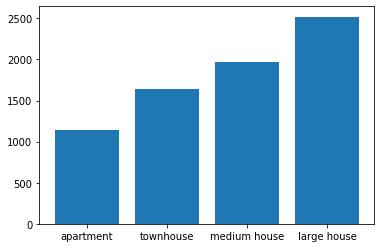

In [23]:
def calculateExpenses(size):
    phone = 65
    internet = 100
    if size == 'apartment':
        rent = 900
        heating = 0
        electricity = 50
        waterAndWaste = 0
    if size == 'townhouse':
        rent = 1200
        heating = 67
        electricity = 75
        waterAndWaste = 100
    if size == 'medium house':
        rent = 1500
        heating = 100
        electricity = 75
        waterAndWaste = 100
    if size == 'large house':
        rent = 2000
        heating = 125
        electricity = 100
        waterAndWaste = 100
    expenses = rent + heating + electricity + waterAndWaste + tenantInsurance + phone + internet
    return(expenses)

homeSizes = ['apartment', 'townhouse', 'medium house', 'large house']
expensesList = []
for size in homeSizes:
    expensesList.append(calculateExpenses(size))

%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(homeSizes, expensesList)

# Cost of Items over Time

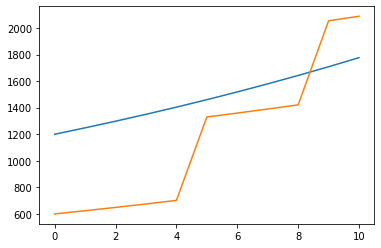

In [57]:
costOfItem1 = 1200
costOfItem2 = 600
buyItem2Every = 4
interestRate = 0.04  # 4%

def futureCost(initialCost, years, interestRate):
    cost = initialCost * (1 + interestRate) ** years
    return(cost)

item1 = []
item2 = []
for years in range(0, 11):
    item1.append(futureCost(costOfItem1, years, interestRate))
    if years > buyItem2Every:
        if years > buyItem2Every*2:
            item2.append(futureCost(costOfItem2, years, interestRate) + costOfItem2*2)
        else:
            item2.append(futureCost(costOfItem2, years, interestRate) + costOfItem2)
    else:
        item2.append(futureCost(costOfItem2, years, interestRate))
    
        
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(item1)
plt.plot(item2)

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)